# importing required libraries

In [ ]:
pip install textblob==0.17.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Attempting uninstall: textblob
    Found existing installation: textblob 0.3.4
    Uninstalling textblob-0.3.4:
      Successfully uninstalled textblob-0.3.4
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud==1.9.1.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.2/12.2 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 482.8/482.8 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 3.6 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
import nltk
import re
from tqdm.notebook import tqdm_notebook
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [ ]:
df=pd.read_csv("C:/Users/sravanthi/Downloads/Elon_musk.csv",encoding='latin')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
df.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [ ]:
df.shape

(1999, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
df["Text"]
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Cleaning Tweets
tweet_one = df.iloc[4]["Text"]

In [ ]:
def TweetCleaning(tweets):
    cleantweet = re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
    cleantweet = re.sub(r"#[a-zA-Z0-9]+"," ",cleantweet)
    cleantweet=''.join(word for word in cleantweet.split() if word not in stop_words)
    return cleantweet

In [ ]:
def calpolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [ ]:
def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

In [ ]:
def segmentation(tweets):
    if tweets > 0:
        return "positive"
    if tweets== 0:
        return "neutral"
    else:
        return "negative"

In [ ]:
df["cleanedtweets"]=df['Text'].apply(TweetCleaning)
df['polarity']=df["cleanedtweets"].apply(calpolarity)
df['subjectivity']=df["cleanedtweets"].apply(calSubjectivity)
df['segmentation']=df["polarity"].apply(segmentation)

In [ ]:
df.head()

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,4,@gtera27 Doge is underestimated,Dogeunderestimated,0.0,0.0,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaamazingexecutionlasty...,0.0,0.0,neutral


In [ ]:
# Analysis and visualization
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,3
neutral,1914
positive,82


In [ ]:
# Top three positive tweets
df.sort_values(by=['polarity'],ascending=False).head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
1594,1595,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,979,@lexfridman Nice,Nice,0.6,1.0,positive
1017,1018,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [ ]:
# Top three negative tweets
df.sort_values(by=['polarity'],ascending=True).head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
852,853,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,418,@OLHZN Minor,Minor,-0.05,0.20,negative
741,742,@PPathole Strange,Strange,-0.05,0.15,negative


In [ ]:
# Top three neutral tweets
df['polarity']==0
df[df['polarity']==0].head(3)

,Unnamed: 0,Text,cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


In [ ]:
df["cleanedtweets"]

0                                                Imalien
1       _AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...
2                                         Greatinterview!
3                                      Dogeunderestimated
4       CongratulationsTeslaChinaamazingexecutionlasty...
                              ...                        
1994    True,soundssurreal,negativepropagandastill&amp...
1995    Makesurereadurterms&amp;conditionsclickingaccept!
1996                                        SamwiseGamgee
1997              AlthoDumbDumber<U+0001F525><U+0001F525>
1998                               ProgressupdateAugust28
Name: cleanedtweets, Length: 1999, dtype: object

In [ ]:
# Joining the list into one string/text
text = ' '.join(df["cleanedtweets"])
text

'I\x92malien _AA_CarmackRaytracingCyberpunkHDRnext-level.Havetriedit? Greatinterview! Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyear.Nownextevenmore!! HappyNewYearOx!https://t.co/9WFKMYu2oj Frodounderdoge,Allthoughtwouldfail,Himselfall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelyrepresentreal-worldtimeallocation. Theentertainingoutcomelikely Justsent JustagreeClubhouse https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilX,toddlerhodler Hedefinitelyissues,sentencingseemsbithigh Thanksfixing Pleaseunlockaccount <U+0001F923><U+0001F923> Thistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RT:NASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemission!https://t.co/3pWt Yes _Oncepredictcashflowreasonablywell,StarlinkIPO _Starlinkstaggeringlydifficulttechnical&amp;economicendeavor.However,https://t.co/9Z8Ac6skqx _SpaceXneedspassdeepchasmnegativecashflownextyearhttps://t.co/7J1c9

In [ ]:
# Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'I\x92malien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMusts

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'Dogeunderestimated', 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore', 'HappyNewYearOxhttpstco9WFKMYu2oj', 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'Theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt', 'Yes', 'OncepredictcashflowreasonablywellStarlinkIPO', 'StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx', 'SpaceXneedspassdeepchasmnegativecashflownextyearhttpst

In [ ]:
# Removing stopwords
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

In [ ]:
# Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])

['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestimated', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathanks', 'indeedtweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'justsent', 'justagreeclubhouse', 'httpstco3rwe9uhsts', 'it\x92sgettingreal', 'boughtdogecoinlilxtoddlerhodler', 'hedefinitelyissuessentencingseemsbithigh', 'thanksfixing', 'pleaseunlockaccount', 'u0001f923u0001f923', 'thistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo', 'starlinkstaggeringlydifficulttechnicalampeconomicendeavorhoweverhttpstco9z8ac6skqx', 'spacexneedspassdeepchasmnegativecashflownextyearhttpst

In [ ]:
# Stemming the data
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])

['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestim', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelyrepresentrealworldtimealloc', 'theentertainingoutcomelik']


In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Imalien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS Itsgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwontgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMustscalableght

In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


# Feature Extraction

1.Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])
print(X.toarray().shape)

{'malien': 846, 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit': 41, 'greatinterview': 528, 'dogeunderestim': 344, 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor': 298, 'happynewyearoxhttpstco9wfkmyu2oj': 558, 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm': 478, 'hahathank': 552, 'indeedtweetsdefinitelyrepresentrealworldtimealloc': 699, 'theentertainingoutcomelik': 1696, 'justsent': 763, 'justagreeclubhous': 754, 'httpstco3rwe9uhst': 603, 'it': 719, 'sgettingr': 1397, 'boughtdogecoinlilxtoddlerhodl': 225, 'hedefinitelyissuessentencingseemsbithigh': 570, 'thanksfix': 1665, 'pleaseunlockaccount': 1071, 'u0001f923u0001f923': 1896, 'thistruepowerhahahttpstcofc9uhqsd7o': 1778, 'anycryptowalletwon': 146, 'tgiveprivatekeysavoidedcost': 1660, 'yourappsuck': 2111, 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt': 1231, 'ye': 2053, 'oncepredictcashflowreasonablywellstarlinkipo': 1026, 'starlinkstaggeringlydifficu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2.CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
# Bigrams and Trigrams
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df["cleanedtweets"])
bow_matrix_ngram
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f1e9', '0001f1e9 0001f1ea', '0001f1ea', '0001f339', '0001f3b6', '0001f440', '0001f44d', '0001f495', '0001f4af', '0001f525', '0001f525 0001f525', '0001f5a4', '0001f600', '0001f609', '0001f680', '0001f923', '0001f923 0001f923', '0435', '043b', '043e', '100', '200d', '2192', '2192 https', '2192 https co', '2660', '2660 fe0f', '26a1', '26a1 fe0f', '_enoughyes', 'absolutely', 'agreed', 'also', 'amp', 'amp https', 'amp https co', 'buhttps', 'buhttps co', 'but', 'can', 'co', 'comingsoon', 'cool', 'doesn', 'doge', 'don', 'exactly', 'falcon9', 'fe0f', 'forsure', 'goodanalysis', 'goodpoint', 'greatgame', 'gt', 'haha', 'hahatrue', 'hopefully', 'however', 'https', 'https co', 'indeed', 'it', 'liftoff', 'liftoff https', 'liftoff https co', 'long', 'lt', 'no', 'notbad', 'ok', 'prettymuch', 'rt', 'rt falcon9', 'rt https', 'rt https co', 'rt liftoff', 'rt liftoff https', 'rt_crew', 'shttps', 'shttps co', 'sigh', 'sorry', 'spacex', 'sure', 'technically', 'term', 'tesla', 'thankyou', 'that', 'the'

3.TF-IDF Vectorizer

In [ ]:
# TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df["cleanedtweets"])
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f923', '0001f923 0001f923', 'amp', 'co', 'https', 'https co', 'it', 'rt', 'we', 'yes']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Wordcloud
import matplotlib.pyplot as plt
# %matplotlib inline
from wordcloud import WordCloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

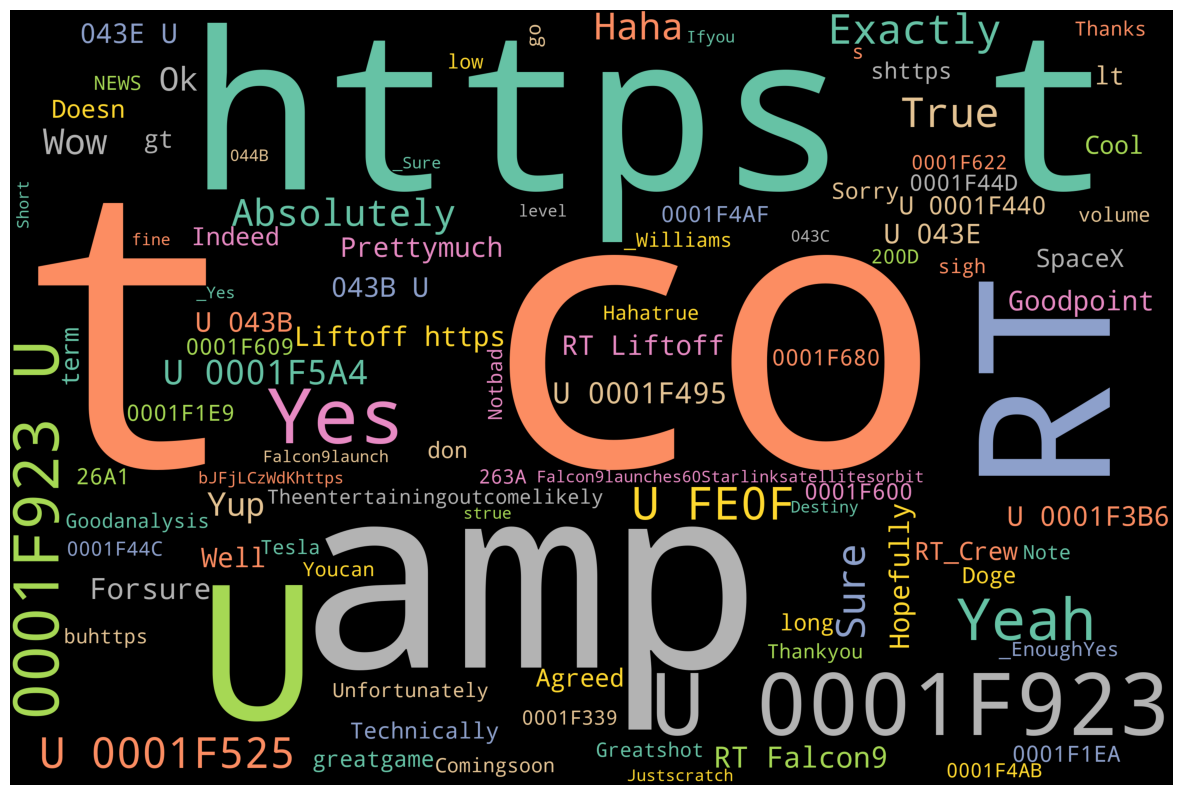

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(text)
plot_cloud(wordcloud)
plt.show()

# For Sentimental Analysis

In [ ]:
tweets1 = pd.read_csv(r"C:/Users/sravanthi/Downloads/Elon_musk.csv",encoding=('latin'))
tweets1.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets1.rename({'Text':'Tweets'},axis=1,inplace=True)
tweets1

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweets1 = [Tweets.strip() for Tweets in tweets1.Tweets] # remove both the leading and the trailing characters
tweets1 = [Tweets for Tweets in tweets1 if Tweets] # removes empty strings, because they are considered in Python as False

In [ ]:
import spacy
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets1))
sentences[5:50]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [ ]:
text_df = pd.DataFrame(sentences, columns=['text'])
text_df

,text
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
affinity_scores = text_df.set_index('text').to_dict()
affinity_scores

{}

In [ ]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

In [ ]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'tweets')

0

In [ ]:
text_df['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                   (1.0, 0.75)
3    (0.30000000000000004, 0.48333333333333334)
4                              (0.390625, 0.25)
Name: text, dtype: object

In [ ]:
text_df['sentiment'] = text_df['text'].apply(lambda x: TextBlob(x).sentiment[0] )
text_df[['text','sentiment']]

,text,sentiment
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,-0.250000
1,Have you tried it?,0.000000
2,@joerogan @Spotify Great interview!,1.000000
3,@gtera27 Doge is underestimated @teslacn Congr...,0.300000
4,Now on to the next for even more!!,0.390625
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0.000000
920,"It may never pay out, as the stock cant b ht...",0.016667
921,Details Aug 28.,0.000000
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0.184524


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

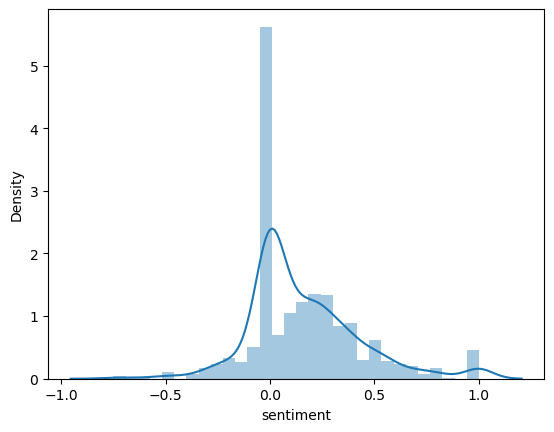

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(text_df['sentiment'])

<AxesSubplot:xlabel='index', ylabel='sentiment'>

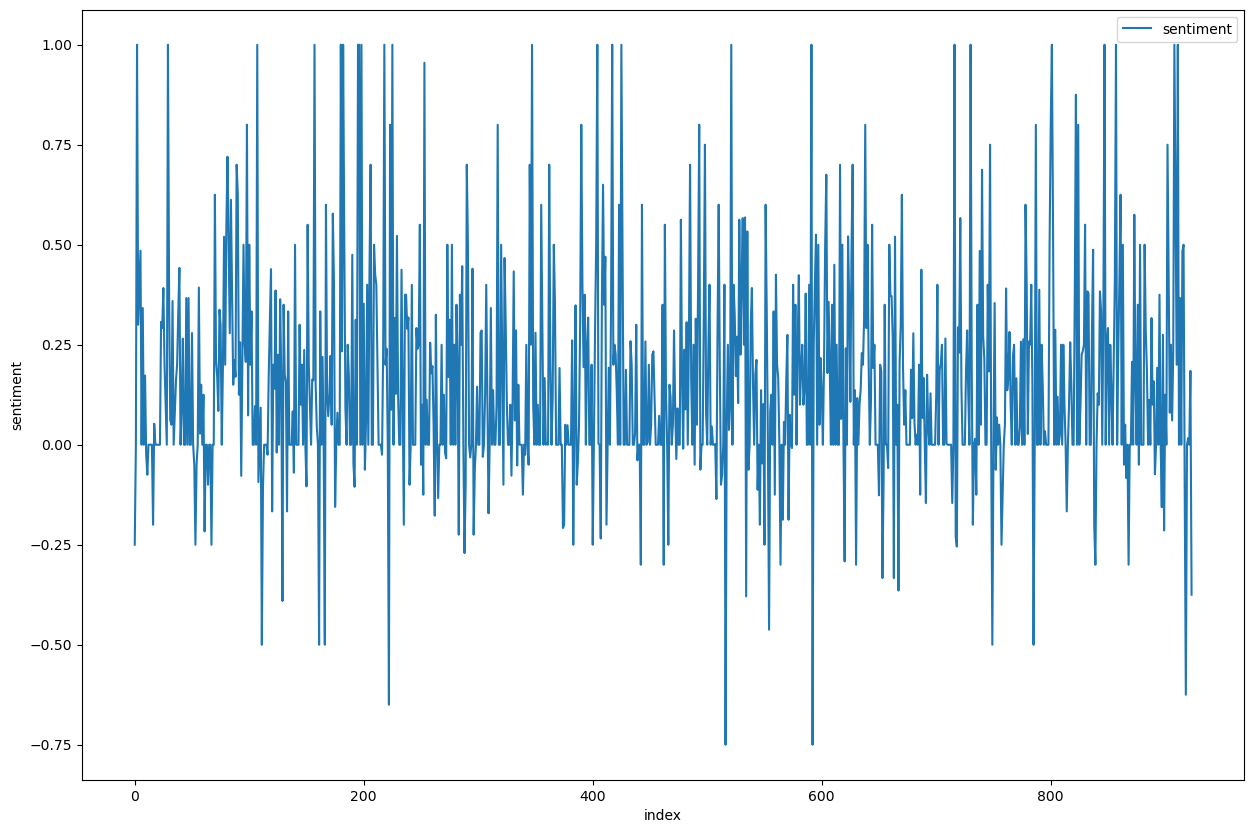

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('index')
plt.ylabel('sentiment')
sns.lineplot(data=text_df)